In [5]:

import numpy as np 
import pandas as pd 
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from math import log,exp
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/Users/vinh/Desktop/Python/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/Users/vinh/Desktop/Python/data/.DS_Store
/Users/vinh/Desktop/Python/data/letters_CG.csv
/Users/vinh/Desktop/Python/data/spam_email.csv


In [6]:
data_letter = pd.read_csv('./data/letters_CG.csv')
data_letter = data_letter.drop('Unnamed: 17', axis = 1)
data_letter.head()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [7]:
letters = data_letter[(data_letter['Class'] == "C") | (data_letter['Class'] == "G")]

letters['Label'] = letters['Class'].replace(to_replace = ['C','G'], value=[1,-1])


In [8]:
# Bước 1
letters["weight"] = 1 / (letters.shape[0])
letters = letters.drop('Class', axis = 1)

In [9]:
# Bước 2
random.seed(10)
letters1 = letters.sample(len(letters), replace = True, weights = letters['weight'])

[Text(0.5, 0.75, 'X[11] <= 11.5\ngini = 0.5\nsamples = 1509\nvalue = [759, 750]'),
 Text(0.25, 0.25, 'gini = 0.423\nsamples = 1012\nvalue = [705, 307]'),
 Text(0.75, 0.25, 'gini = 0.194\nsamples = 497\nvalue = [54, 443]')]

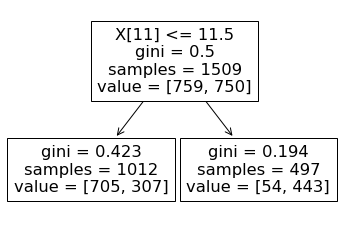

In [10]:
X_train = letters1.drop('Label', axis = 1)
y_train = letters1.Label

clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 1)
clf = clf_gini.fit(X_train, y_train)

tree.plot_tree(clf)

In [11]:
#prediction
y_pred = clf_gini.predict(X_train)
y_pred


array([-1, -1, -1, ..., -1, -1,  1])

In [12]:
#adding a column pred1 after the first round of boosting
letters['predict'] = y_pred
letters

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,Label,weight,predict
0,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,1,0.000663,-1
1,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,1,0.000663,-1
2,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10,-1,0.000663,-1
3,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7,1,0.000663,-1
4,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9,-1,0.000663,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,9,12,2,10,4,9,1,0.000663,-1
1505,6,11,7,8,4,6,7,10,9,10,7,11,2,12,4,9,1,0.000663,-1
1506,5,9,6,7,4,6,7,6,6,10,7,10,2,9,5,9,-1,0.000663,-1
1507,6,11,7,8,5,5,8,7,6,8,8,15,4,9,6,6,1,0.000663,-1


In [13]:
#misclassified = 0 if the label and prediction are same
letters.loc[letters.Label != letters.predict, 'misclassified'] = 1
letters.loc[letters.Label == letters.predict, 'misclassified'] = 0

In [14]:
#error calculation
error_1 = sum(letters['misclassified'] * letters['weight'])
error_1

0.4844267726971546

In [15]:
#calculation of alpha (performance)
alpha_1 = 0.5 * log((1 - error_1) / error_1)

alpha_1

0.031156532214298184

In [16]:
#update weight
new_weight = letters['weight'] * np.exp(-1 * alpha_1 * letters['Label'] * letters['predict'])

In [17]:
#normalized weight
z = sum(new_weight)
normalized_weight = new_weight / sum(new_weight)

In [18]:
letters['weight_1'] = round(normalized_weight, 4)
letters

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,xy2br,x-ege,xegvy,y-ege,yegvx,Label,weight,predict,misclassified,weight_1
0,4,10,5,8,2,5,7,7,10,7,...,13,1,8,4,9,1,0.000663,-1,1.0,0.0007
1,3,5,4,4,2,4,8,5,7,12,...,11,1,10,2,7,1,0.000663,-1,1.0,0.0007
2,5,10,6,7,3,8,7,8,8,6,...,9,2,7,5,10,-1,0.000663,-1,0.0,0.0006
3,5,9,6,7,4,3,8,6,7,12,...,13,1,9,3,7,1,0.000663,-1,1.0,0.0007
4,4,8,5,6,3,6,6,7,6,10,...,12,2,9,4,9,-1,0.000663,-1,0.0,0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,...,12,2,10,4,9,1,0.000663,-1,1.0,0.0007
1505,6,11,7,8,4,6,7,10,9,10,...,11,2,12,4,9,1,0.000663,-1,1.0,0.0007
1506,5,9,6,7,4,6,7,6,6,10,...,10,2,9,5,9,-1,0.000663,-1,0.0,0.0006
1507,6,11,7,8,5,5,8,7,6,8,...,15,4,9,6,6,1,0.000663,-1,1.0,0.0007


In [19]:
#round 2
random.seed(20)
letters_2 = letters.sample(len(letters), replace = True, weights = letters['weight_1'])
letters_2 = letters_2.iloc[:,0:17]
X_train = letters_2.iloc[0:len(data_letter),0:16]
y_train = letters_2.Label

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(letters.iloc[0:len(data_letter),0:16])
#adding a column pred2 after the second round of boosting
letters['predict_1'] = y_pred


[Text(0.5, 0.75, 'X[11] <= 10.5\ngini = 0.499\nsamples = 1509\nvalue = [721, 788]'),
 Text(0.25, 0.25, 'gini = 0.321\nsamples = 702\nvalue = [561, 141]'),
 Text(0.75, 0.25, 'gini = 0.318\nsamples = 807\nvalue = [160, 647]')]

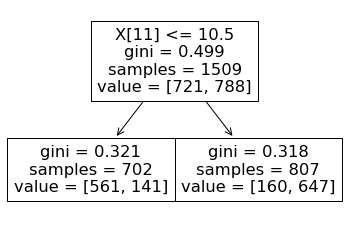

In [20]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [21]:
letters

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,x-ege,xegvy,y-ege,yegvx,Label,weight,predict,misclassified,weight_1,predict_1
0,4,10,5,8,2,5,7,7,10,7,...,1,8,4,9,1,0.000663,-1,1.0,0.0007,1
1,3,5,4,4,2,4,8,5,7,12,...,1,10,2,7,1,0.000663,-1,1.0,0.0007,1
2,5,10,6,7,3,8,7,8,8,6,...,2,7,5,10,-1,0.000663,-1,0.0,0.0006,-1
3,5,9,6,7,4,3,8,6,7,12,...,1,9,3,7,1,0.000663,-1,1.0,0.0007,1
4,4,8,5,6,3,6,6,7,6,10,...,2,9,4,9,-1,0.000663,-1,0.0,0.0006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,...,2,10,4,9,1,0.000663,-1,1.0,0.0007,1
1505,6,11,7,8,4,6,7,10,9,10,...,2,12,4,9,1,0.000663,-1,1.0,0.0007,1
1506,5,9,6,7,4,6,7,6,6,10,...,2,9,5,9,-1,0.000663,-1,0.0,0.0006,-1
1507,6,11,7,8,5,5,8,7,6,8,...,4,9,6,6,1,0.000663,-1,1.0,0.0007,1


In [22]:
#misclassified = 0 if the label and prediction are same
letters.loc[letters.Label != letters.predict_1, 'misclassified1'] = 1
letters.loc[letters.Label == letters.predict_1, 'misclassified1'] = 0

In [23]:
#error calculation
error_2 = sum(letters['misclassified1'] * letters['weight_1'])
error_2

0.21220000000000006

In [24]:
#calculation of alpha (performance)
alpha_2 = 0.5 * log((1 - error_2) / error_2)
alpha_2

0.6558575121784612

In [25]:
#update weight
new_weight = letters['weight_1'] * np.exp(-1 * alpha_2 * letters['Label'] * letters['predict_1'])

#normalized weight
z = sum(new_weight)
normalized_weight = new_weight / sum(new_weight)

In [26]:
letters['weight_2'] = round(normalized_weight, 4)
letters

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,y-ege,yegvx,Label,weight,predict,misclassified,weight_1,predict_1,misclassified1,weight_2
0,4,10,5,8,2,5,7,7,10,7,...,4,9,1,0.000663,-1,1.0,0.0007,1,0.0,0.0005
1,3,5,4,4,2,4,8,5,7,12,...,2,7,1,0.000663,-1,1.0,0.0007,1,0.0,0.0005
2,5,10,6,7,3,8,7,8,8,6,...,5,10,-1,0.000663,-1,0.0,0.0006,-1,0.0,0.0004
3,5,9,6,7,4,3,8,6,7,12,...,3,7,1,0.000663,-1,1.0,0.0007,1,0.0,0.0005
4,4,8,5,6,3,6,6,7,6,10,...,4,9,-1,0.000663,-1,0.0,0.0006,1,1.0,0.0014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,...,4,9,1,0.000663,-1,1.0,0.0007,1,0.0,0.0005
1505,6,11,7,8,4,6,7,10,9,10,...,4,9,1,0.000663,-1,1.0,0.0007,1,0.0,0.0005
1506,5,9,6,7,4,6,7,6,6,10,...,5,9,-1,0.000663,-1,0.0,0.0006,-1,0.0,0.0004
1507,6,11,7,8,5,5,8,7,6,8,...,6,6,1,0.000663,-1,1.0,0.0007,1,0.0,0.0005


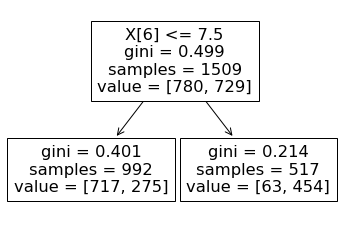

In [27]:
#round 3
random.seed(30)
letters_3 = letters.sample(len(letters), replace = True, weights = letters['weight_2'])
letters_3 = letters_3.iloc[:,0:17]
X_train = letters_3.iloc[0:len(data_letter),0:16]
y_train = letters_3.Label

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(letters.iloc[0:len(data_letter),0:16])

#adding a column pred2 after the second round of boosting
letters['predict_2'] = y_pred

#plotting tree for round 3 boosting
tree.plot_tree(clf)

#misclassified = 0 if the label and prediction are same
letters.loc[letters.Label != letters.predict_2, 'misclassified2'] = 1
letters.loc[letters.Label == letters.predict_2, 'misclassified2'] = 0

#error calculation
error_3 = sum(letters['misclassified2'] * letters['weight_2'])

#calculation of alpha (performance)
alpha_3 = 0.5 * log((1 - error_3) / error_3)

#update weight
new_weight = letters['weight_2'] * np.exp(-1 * alpha_3 * letters['Label'] * letters['predict_2'])

#normalized weight
z = sum(new_weight)
normalized_weight = new_weight / sum(new_weight)

letters['weight_3'] = round(normalized_weight, 4)

In [28]:
letters

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,weight,predict,misclassified,weight_1,predict_1,misclassified1,weight_2,predict_2,misclassified2,weight_3
0,4,10,5,8,2,5,7,7,10,7,...,0.000663,-1,1.0,0.0007,1,0.0,0.0005,-1,1.0,0.0010
1,3,5,4,4,2,4,8,5,7,12,...,0.000663,-1,1.0,0.0007,1,0.0,0.0005,1,0.0,0.0003
2,5,10,6,7,3,8,7,8,8,6,...,0.000663,-1,0.0,0.0006,-1,0.0,0.0004,-1,0.0,0.0003
3,5,9,6,7,4,3,8,6,7,12,...,0.000663,-1,1.0,0.0007,1,0.0,0.0005,1,0.0,0.0003
4,4,8,5,6,3,6,6,7,6,10,...,0.000663,-1,0.0,0.0006,1,1.0,0.0014,-1,0.0,0.0009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,...,0.000663,-1,1.0,0.0007,1,0.0,0.0005,1,0.0,0.0003
1505,6,11,7,8,4,6,7,10,9,10,...,0.000663,-1,1.0,0.0007,1,0.0,0.0005,-1,1.0,0.0010
1506,5,9,6,7,4,6,7,6,6,10,...,0.000663,-1,0.0,0.0006,-1,0.0,0.0004,-1,0.0,0.0003
1507,6,11,7,8,5,5,8,7,6,8,...,0.000663,-1,1.0,0.0007,1,0.0,0.0005,1,0.0,0.0003


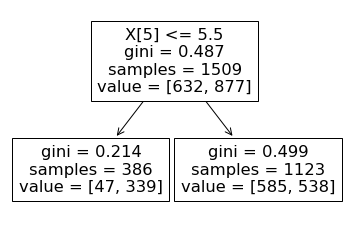

In [29]:
#round 4
random.seed(40)
letters_4 = letters.sample(len(letters), replace = True, weights = letters['weight_3'])
letters_4 = letters_4.iloc[:,0:17]
X_train = letters_4.iloc[0:len(data_letter),0:16]
y_train = letters_4.Label

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(letters.iloc[0:len(data_letter),0:16])

#adding a column pred2 after the second round of boosting
letters['predict_3'] = y_pred

#plotting tree for round 3 boosting
tree.plot_tree(clf)

#misclassified = 0 if the label and prediction are same
letters.loc[letters.Label != letters.predict_3, 'misclassified3'] = 1
letters.loc[letters.Label == letters.predict_3, 'misclassified3'] = 0

#error calculation
error_4 = sum(letters['misclassified3'] * letters['weight_3'])

#calculation of alpha (performance)
alpha_4 = 0.5 * log((1 - error_4) / error_4)


In [30]:
#printing the alpha value which is used in each round of boosting
print(alpha_1)
print(alpha_2)
print(alpha_3)
print(alpha_4)

0.031156532214298184
0.6558575121784612
0.5611092675231276
0.23820544225449156


In [31]:
#final prediction
t = alpha_1 * letters['predict'] + alpha_2 * letters['predict_1'] + alpha_3 * letters['predict_2'] + alpha_4 * letters['predict_3']

In [32]:
#sign of the final prediction
np.sign(list(t))

array([ 1.,  1., -1., ..., -1.,  1., -1.])

In [33]:
letters['final_pred'] = np.sign(list(t))
letters

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,weight_1,predict_1,misclassified1,weight_2,predict_2,misclassified2,weight_3,predict_3,misclassified3,final_pred
0,4,10,5,8,2,5,7,7,10,7,...,0.0007,1,0.0,0.0005,-1,1.0,0.0010,1,0.0,1.0
1,3,5,4,4,2,4,8,5,7,12,...,0.0007,1,0.0,0.0005,1,0.0,0.0003,1,0.0,1.0
2,5,10,6,7,3,8,7,8,8,6,...,0.0006,-1,0.0,0.0004,-1,0.0,0.0003,-1,0.0,-1.0
3,5,9,6,7,4,3,8,6,7,12,...,0.0007,1,0.0,0.0005,1,0.0,0.0003,1,0.0,1.0
4,4,8,5,6,3,6,6,7,6,10,...,0.0006,1,1.0,0.0014,-1,0.0,0.0009,-1,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,...,0.0007,1,0.0,0.0005,1,0.0,0.0003,1,0.0,1.0
1505,6,11,7,8,4,6,7,10,9,10,...,0.0007,1,0.0,0.0005,-1,1.0,0.0010,-1,1.0,-1.0
1506,5,9,6,7,4,6,7,6,6,10,...,0.0006,-1,0.0,0.0004,-1,0.0,0.0003,-1,0.0,-1.0
1507,6,11,7,8,5,5,8,7,6,8,...,0.0007,1,0.0,0.0005,1,0.0,0.0003,1,0.0,1.0


In [34]:
#Confusion matrix
confusionMatrix = confusion_matrix(letters['Label'], letters['final_pred'])
confusionMatrix

array([[740,  33],
       [255, 481]])

In [35]:
#Overall Accuracy
(confusionMatrix[0,0] + confusionMatrix[1,1]) / np.sum(confusionMatrix) * 100

80.9145129224652

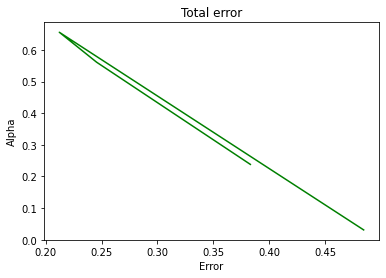

In [36]:
plt.plot([error_1, error_2, error_3, error_4], [alpha_1, alpha_2, alpha_3, alpha_4], 'g-')
plt.title('Total error')
plt.xlabel('Error')
plt.ylabel('Alpha')
plt.show()